## Import the Libraries

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load the Training Dataset

In [27]:
df_train = pd.read_csv('train_2016_v2.csv', parse_dates=['transactiondate'])
df_train.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [28]:
df_train.shape

(90275, 3)

## Study Target Variable

The target variable in this case if the 'logerror' field

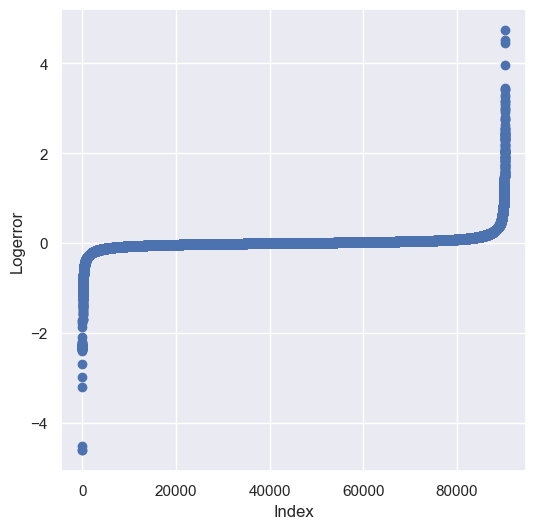

In [29]:
plt.figure(figsize=(6, 6))
plt.scatter(range(df_train.shape[0]), np.sort(df_train['logerror'].values))
plt.xlabel('Index', fontsize=12)
plt.ylabel('Logerror', fontsize=12)
plt.show()

Now let's remove the outliers, and then plot the histogram

In [30]:
upper_limit = np.percentile(df_train['logerror'].values, 99)
lower_limit = np.percentile(df_train['logerror'].values, 1)
df_train.loc[df_train['logerror'] > upper_limit, 'logerror'] = upper_limit
df_train.loc[df_train['logerror'] < lower_limit, 'logerror'] = lower_limit

C:\Users\anupa\.android\trial\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


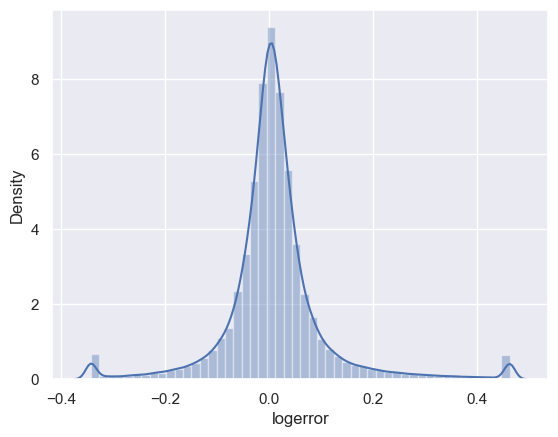

In [31]:
sns.set()
sns.distplot(df_train['logerror'])
plt.xlabel('logerror', fontsize=12)
plt.show()

In [32]:
print('Skewness = ', df_train['logerror'].skew())
print('Kurtosis = ', df_train['logerror'].kurt())

Skewness =  0.8612509167357468
Kurtosis =  6.467058553787075


Now let's explore the 'transactiondate' field

C:\Users\anupa\.android\trial\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


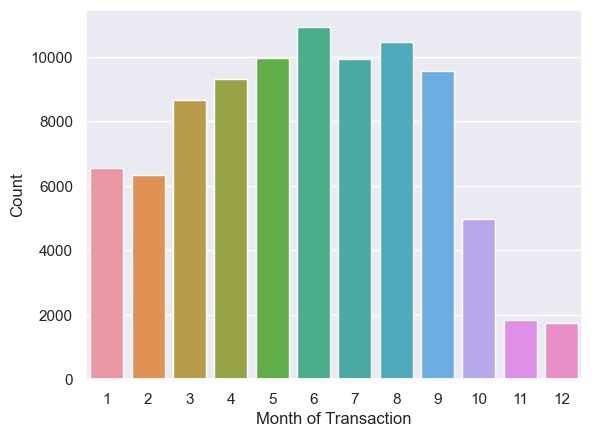

In [33]:
df_train['transaction_month'] = df_train['transactiondate'].dt.month
count_series = df_train['transaction_month'].value_counts()

sns.barplot(count_series.index, count_series.values)
plt.xlabel('Month of Transaction')
plt.ylabel('Count')
plt.show()

Looking at the 'parcelid' field

In [34]:
(df_train['parcelid'].value_counts().reset_index())['parcelid'].value_counts() # unique value counts

1    90026
2      123
3        1
Name: parcelid, dtype: int64

## Study 'properties_2016.csv'

In [35]:
prop_df = pd.read_csv('properties_2016.csv')
prop_df.shape

C:\Users\anupa\AppData\Local\Temp\ipykernel_22340\2073588420.py:1: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  prop_df = pd.read_csv('properties_2016.csv')


(2985217, 58)

In [36]:
prop_df.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


We have got a lot of null values in this dataframe. Let's deal with them.

In [37]:
missing_df = prop_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count'] > 0]
missing_df = missing_df.sort_values(by='missing_count')

In [38]:
missing_df

,column_name,missing_count
35,rawcensustractandblock,11437
25,longitude,11437
24,latitude,11437
37,regionidcounty,11437
17,fips,11437
33,propertylandusetypeid,11437
52,assessmentyear,11439
5,bedroomcnt,11450
4,bathroomcnt,11462
40,roomcnt,11475


In [39]:
np.arange(missing_df.shape[0])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56])

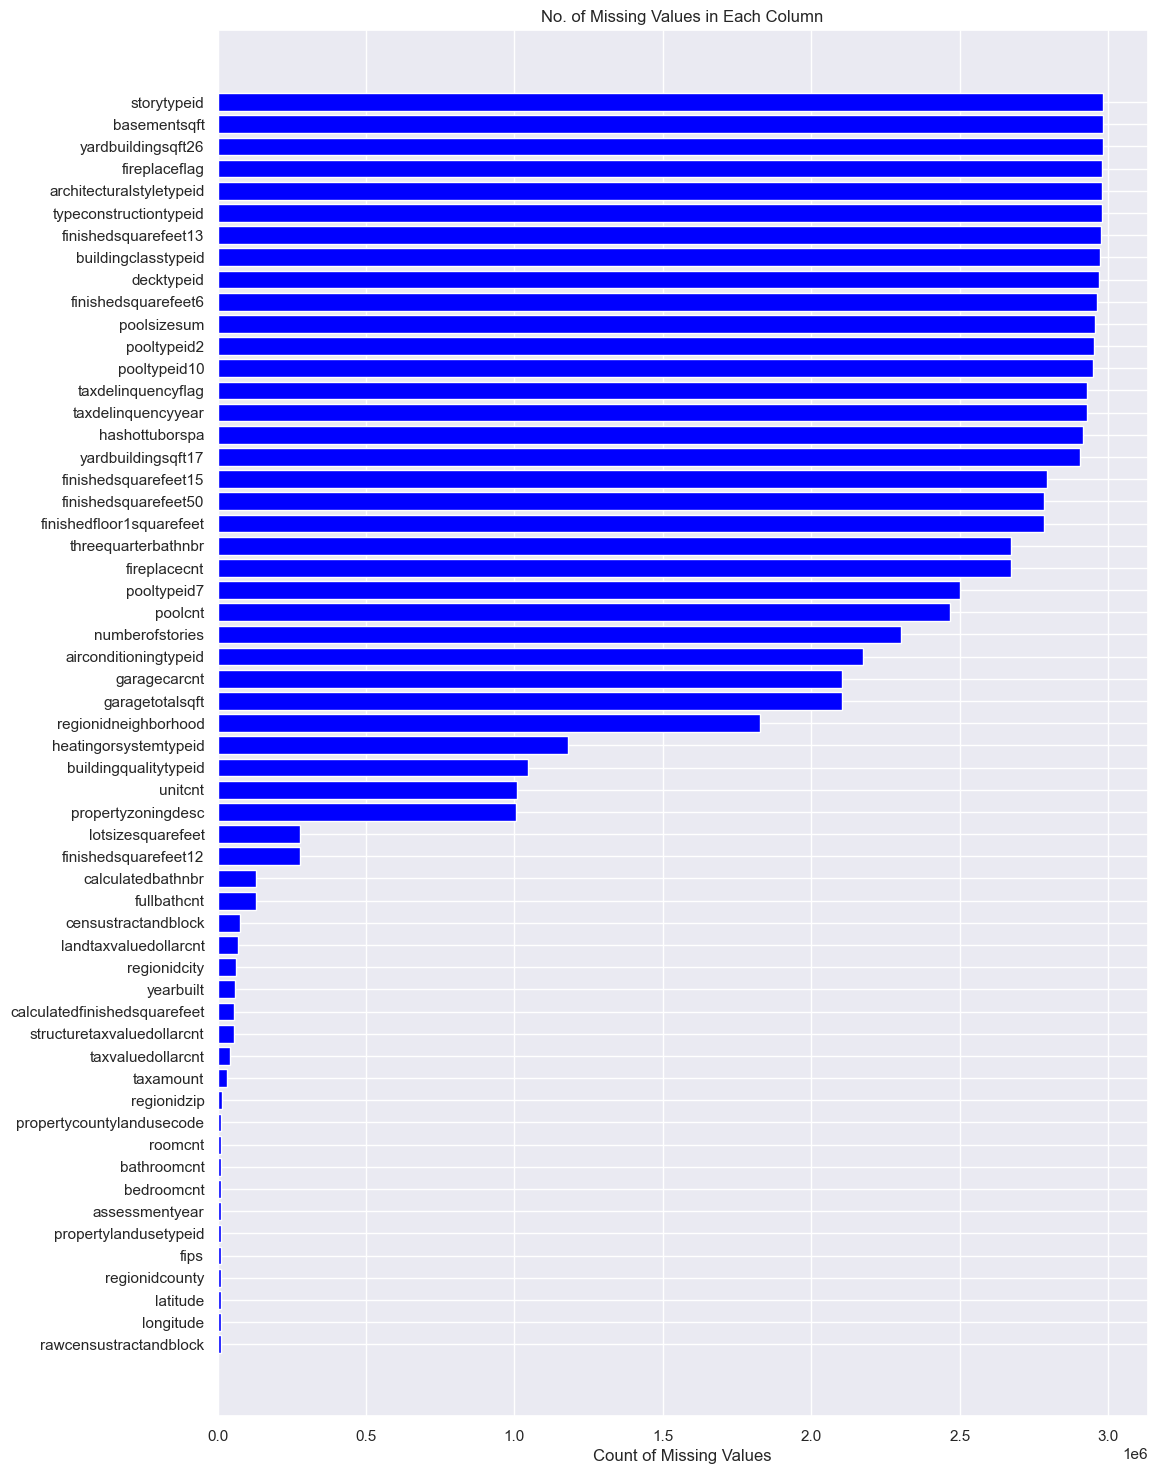

In [40]:
ind = np.arange(missing_df.shape[0])
fig, ax = plt.subplots(figsize=(12, 18))
rects = ax.barh(ind, missing_df['missing_count'].values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df['column_name'].values)
ax.set_xlabel('Count of Missing Values')
ax.set_title('No. of Missing Values in Each Column')
plt.show()

Let's explore the latitude and longitude variables to begin with

<Figure size 1200x1200 with 0 Axes>

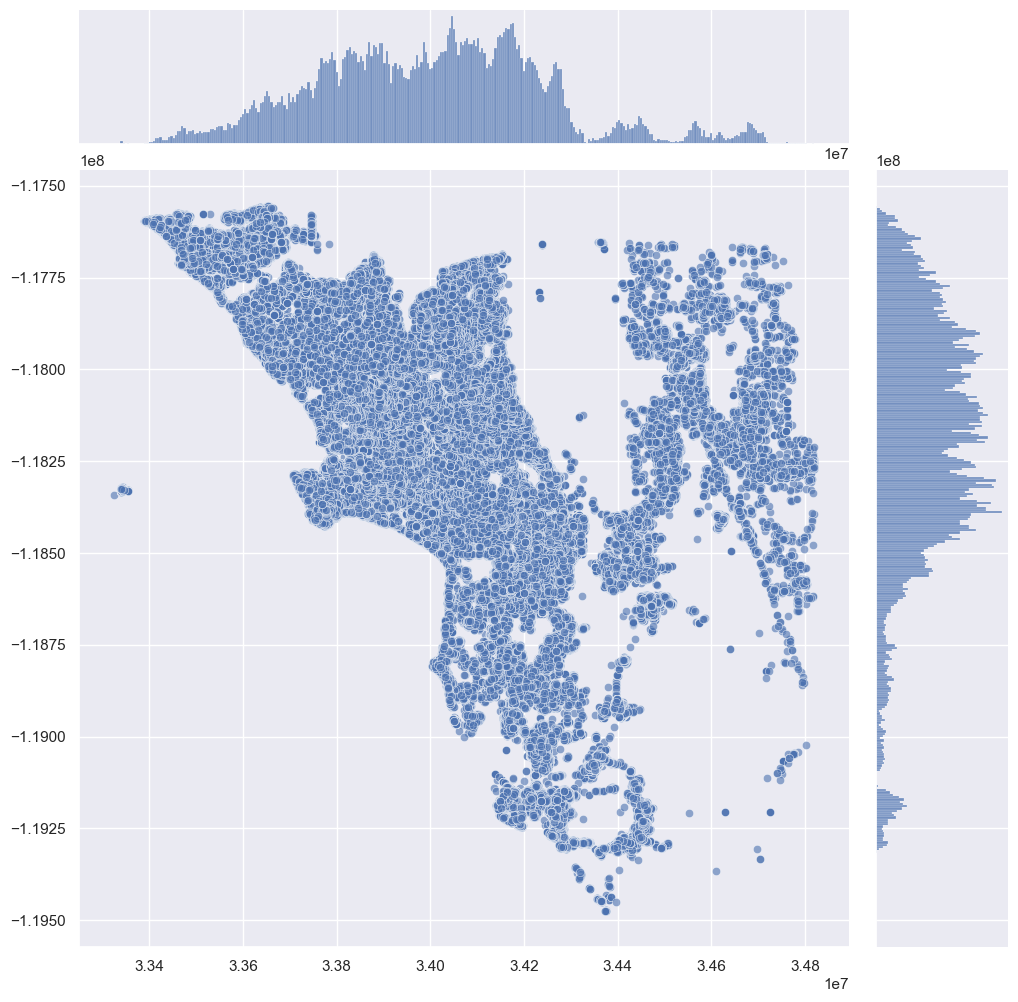

In [41]:
plt.figure(figsize=(12, 12))
sns.jointplot(x=prop_df.latitude.values, y=prop_df.longitude.values, height=10, alpha=0.6)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

In [42]:
prop_df.shape

(2985217, 58)

In [43]:
df_train.shape

(90275, 4)

Let's merge the df_train and prop_df dataframes

In [44]:
train_df = pd.merge(df_train, prop_df, on='parcelid', how='left')
train_df.shape

(90275, 61)

In [45]:
train_df.head()

,parcelid,logerror,transactiondate,transaction_month,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1,1.0,NaN,NaN,2.0,3.0,NaN,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,1,NaN,NaN,NaN,3.5,4.0,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1,1.0,NaN,NaN,3.0,2.0,NaN,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1,1.0,NaN,NaN,2.0,2.0,NaN,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,1,NaN,NaN,NaN,2.5,4.0,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [46]:
pd.options.display.max_rows = 100

dtype_df = train_df.dtypes.reset_index()
dtype_df.columns = ['Column Name', 'Column Type']
dtype_df

,Column Name,Column Type
0,parcelid,int64
1,logerror,float64
2,transactiondate,datetime64[ns]
3,transaction_month,int64
4,airconditioningtypeid,float64
5,architecturalstyletypeid,float64
6,basementsqft,float64
7,bathroomcnt,float64
8,bedroomcnt,float64
9,buildingclasstypeid,float64


Most are float variables, with a few categorical (object) variables. Let's get the count.

In [47]:
dtype_df['Column Type'].value_counts().reset_index()

,index,Column Type
0,float64,53
1,object,5
2,int64,2
3,datetime64[ns],1


Now let's check the number of null values in the merged dataframe

In [48]:
missing_df = train_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / train_df.shape[0]
missing_df.sort_values(by='missing_ratio', ascending=False)

,column_name,missing_count,missing_ratio
9,buildingclasstypeid,90259,0.999823
16,finishedsquarefeet13,90242,0.999634
6,basementsqft,90232,0.999524
44,storytypeid,90232,0.999524
49,yardbuildingsqft26,90180,0.998948
52,fireplaceflag,90053,0.997541
5,architecturalstyletypeid,90014,0.997109
46,typeconstructiontypeid,89976,0.996688
19,finishedsquarefeet6,89854,0.995336
12,decktypeid,89617,0.992711


#### Univariate Analysis:
Since there are so many variables, let us consider the 'float' variables along and see their correlation with the target variable

C:\Users\anupa\AppData\Local\Temp\ipykernel_22340\1956323994.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean_values = train_df.mean(axis=0)
C:\Users\anupa\AppData\Local\Temp\ipykernel_22340\1956323994.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_values = train_df.mean(axis=0)


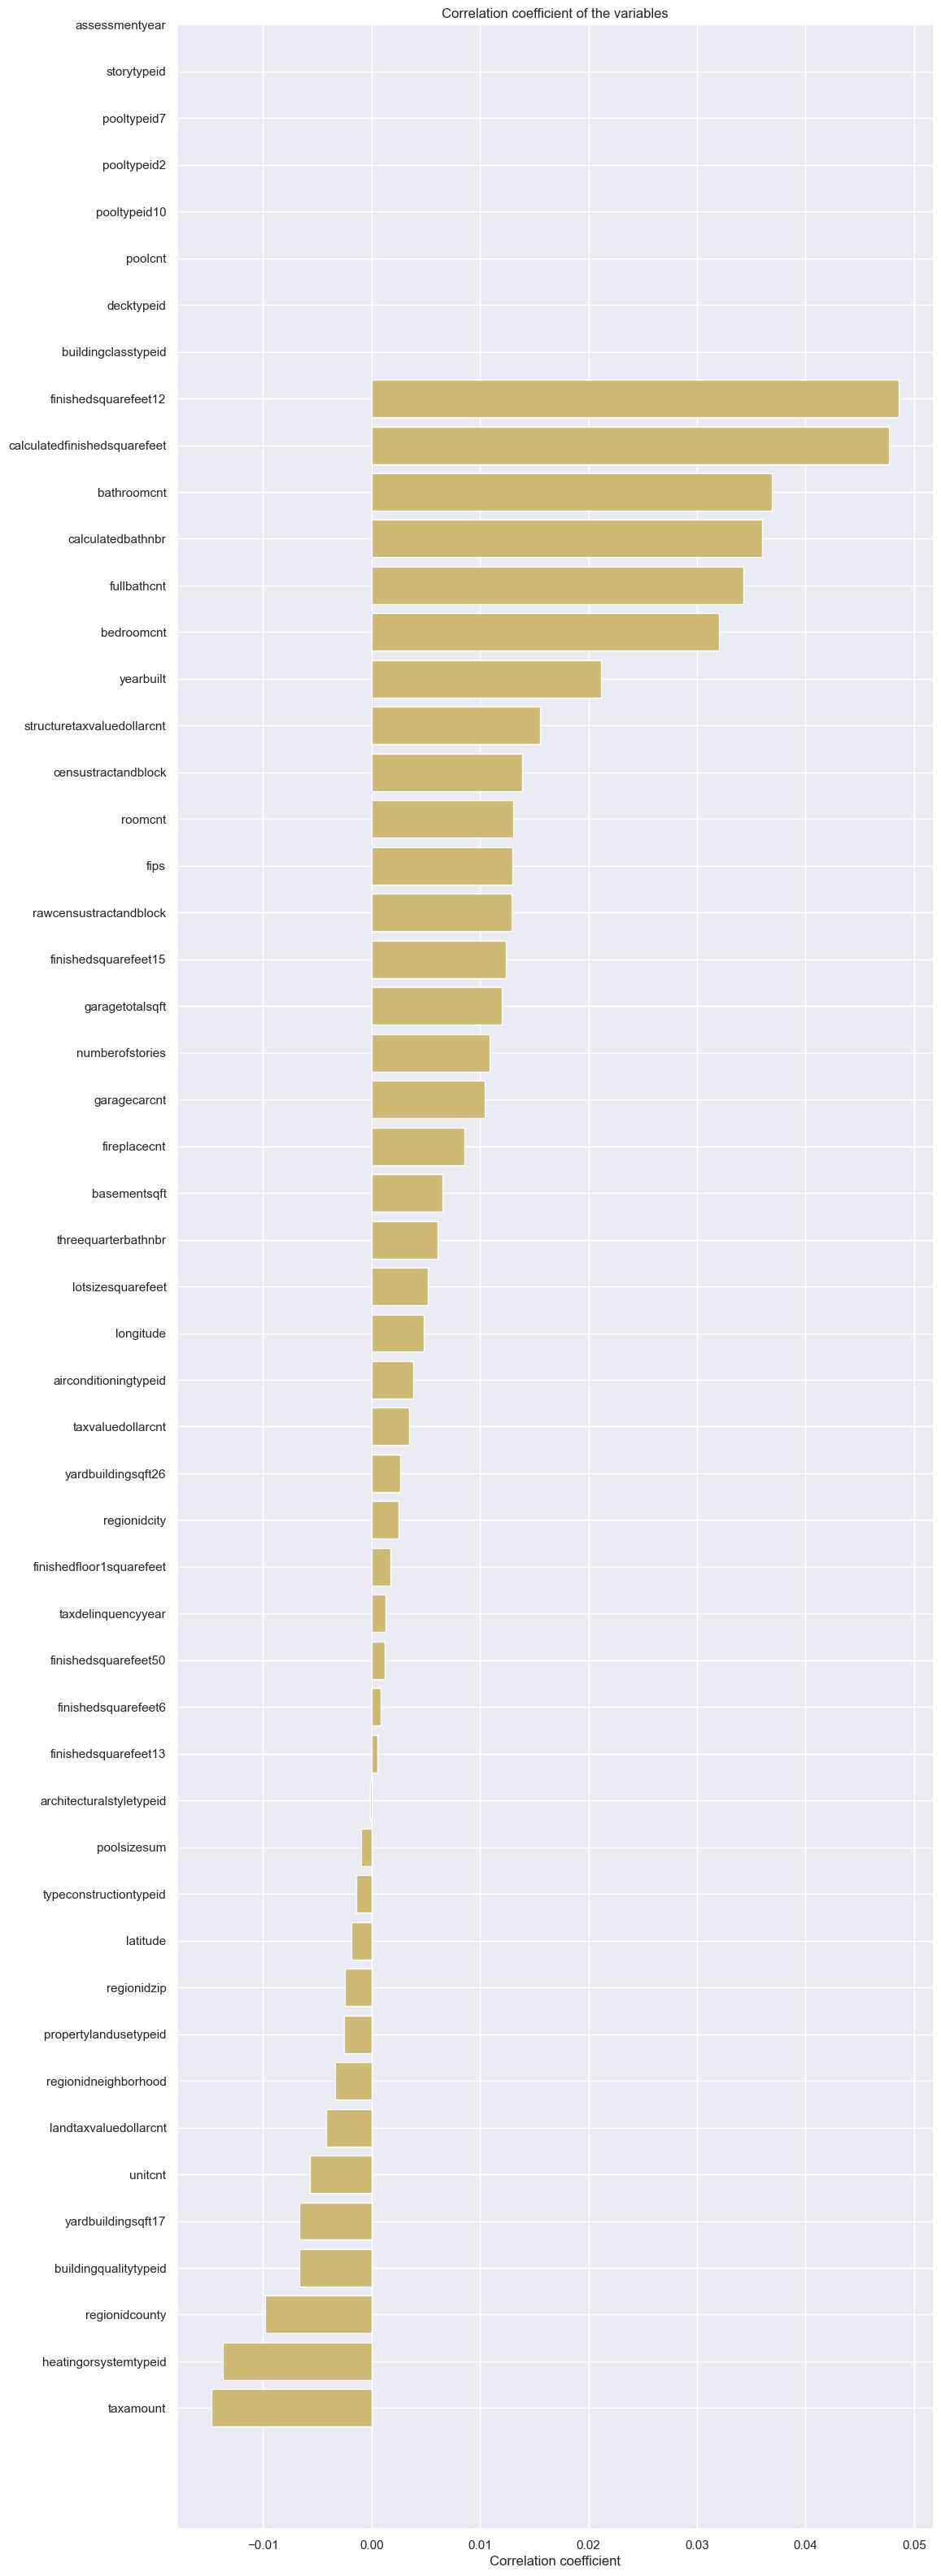

In [69]:
# Let us impute the missing values with mean values to calculate the correlation coefficients
mean_values = train_df.mean(axis=0)
train_df_new = train_df.fillna(mean_values)

# Now let us look at the correlation coefficient coefficient of each of these variables
x_cols = [col for col in train_df_new.columns if col not in ['logerror'] if train_df_new[col].dtype == 'float64']

labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(train_df_new[col].values, train_df_new.logerror.values)[0,1])
corr_df = pd.DataFrame({'col_labels': labels, 'corr_values': values})
corr_df = corr_df.sort_values(by='corr_values')

ind = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='y')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of the variables")
plt.show()

Overall, the correlation between the given features and the target variable is low.
Some features don't have a correlation value. It's probably because these features have a single unique value.

In [71]:
corr_zero_cols = ['assessmentyear', 'storytypeid', 'pooltypeid2', 'pooltypeid7', 'pooltypeid10', 'poolcnt', 'decktypeid', 'buildingclasstypeid']

for col in corr_zero_cols:
    print(col, len(train_df_new[col].unique()))

assessmentyear 1
storytypeid 1
pooltypeid2 1
pooltypeid7 1
pooltypeid10 1
poolcnt 1
decktypeid 1
buildingclasstypeid 1


Confirmed!

Now let us consider the variables with relatively high correlation to the target variable.

In [73]:
corr_df_high = corr_df.loc[(corr_df.corr_values > 0.02) | (corr_df.corr_values < -0.01)]
corr_df_high

,col_labels,corr_values
49,taxamount,-0.014768
21,heatingorsystemtypeid,-0.013732
43,yearbuilt,0.021171
4,bedroomcnt,0.032035
18,fullbathcnt,0.034267
7,calculatedbathnbr,0.036019
3,bathroomcnt,0.036862
10,calculatedfinishedsquarefeet,0.047659
11,finishedsquarefeet12,0.048611
